In [1]:
# !pip list
# import splitfolders
# splitfolders.ratio('./newDogAndCat', output="./Output", seed=1, ratio=(0.8, 0.2))

# Data preperation

In [2]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms.transforms import RandomRotation
from torchvision.transforms.functional_pil import rotate
from torch.utils.data import ConcatDataset
# Augmentation = transforms.Compose([
#     transforms.Resize(size = (256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(45),
#     transforms.CenterCrop(10),
#     transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.ToTensor()
# ])

Augmentation_Flip = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

Augmentation_Rotae = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

Augmentation_Crop = transforms.Compose([
    transforms.CenterCrop(100),
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Augmentation_Color = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.ToTensor()
])

Augmentation_Blur = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

Resize_Only = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Flip_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Flip)

Rotae_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Rotae)

Crop_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Crop)

Color_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Color)

Blur_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Blur)

Train_Dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Resize_Only)

Concat_Flip = ConcatDataset([Train_Dataset, Flip_dataset])
Concat_Rotae = ConcatDataset([Train_Dataset, Rotae_dataset])
Concat_Crop = ConcatDataset([Train_Dataset, Crop_dataset])
Concat_Color = ConcatDataset([Train_Dataset, Color_dataset])
Concat_Blur = ConcatDataset([Train_Dataset, Blur_dataset])

Test_Dataset = datasets.ImageFolder(
    root="./Output/val", 
    transform = Resize_Only)

In [3]:
print(len(Train_Dataset))
print(len(Test_Dataset))

3840
960


In [4]:
import torch
import torch.nn as nn
# set seed
torch.manual_seed(3)
# Load Augmentated Train Data into a DataLoader
Flip_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Flip,
  batch_size = 8,
  shuffle = True,
  )

Rotate_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Rotae,
  batch_size = 8,
  shuffle = True,
  )

Crop_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Crop,
  batch_size = 8,
  shuffle = True,
  )

Color_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Color,
  batch_size = 8,
  shuffle = True,
  )

Blur_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Blur,
  batch_size = 8,
  shuffle = True,
  )

# Load Orignal Train Data into a DataLoader
Orignal_Train_Loader = torch.utils.data.DataLoader(
  dataset = Train_Dataset, 
  batch_size = 8,  
  shuffle = True  
)

# Load Test Data into a DataLoader
Animal_test_loader = torch.utils.data.DataLoader(
  dataset = Test_Dataset, 
  batch_size = 8,  # Make sure this matches with the training dimension
  shuffle = False  # Avoid shuffling.
)

In [5]:
# Check the batch dimensions established with the loader.
for images, labels in Flip_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Rotate_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Crop_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Color_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Blur_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break


for images, labels in Orignal_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Animal_test_loader:  
  print(f'Test Image Batch Shape: {images.shape}')
  print(f'Test Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Test Image Batch Shape: torch.Size([8, 3, 256, 256])
Test Image Label Shape: torch.Size([8])


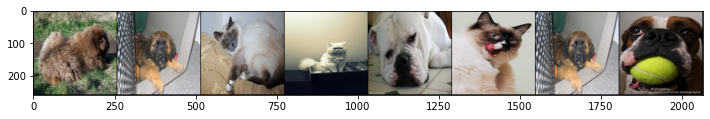

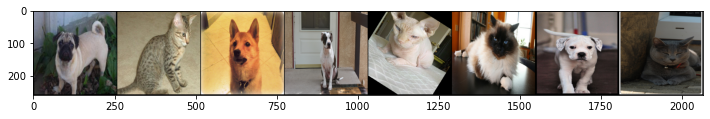

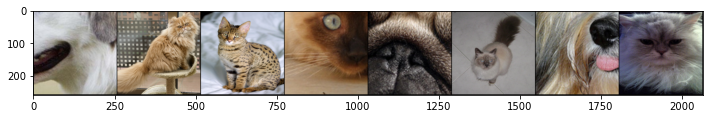

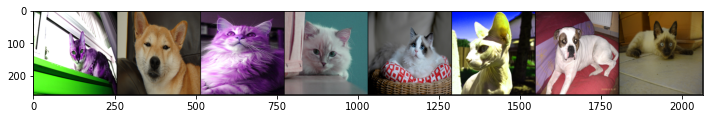

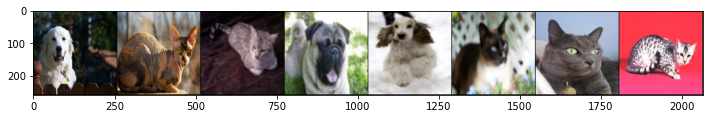

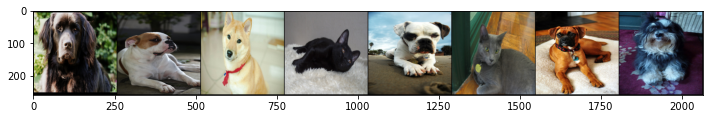

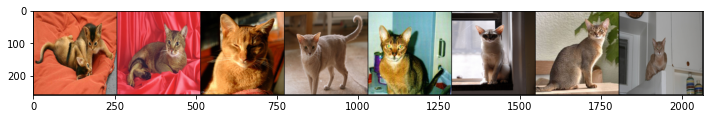

In [6]:
# Construct a graph showing the data transformations
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


def display_pic(x):
    for images, labels in x:
        fig,ax = plt.subplots(figsize = (12,12))
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

display_pic(Flip_Train_Loader)
display_pic(Rotate_Train_Loader)
display_pic(Crop_Train_Loader)
display_pic(Color_Train_Loader)
display_pic(Blur_Train_Loader)
display_pic(Orignal_Train_Loader)
display_pic(Animal_test_loader)

# Model 1

In [7]:
import torch.nn.functional as F 
import torch.optim as optim

class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = L1(nn.Conv2d(3, 16, 3), weight_decay = 0.001)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(16, 32, 2) 
        # 5*5 comes from the dimension of the last convnet layer
        self.norm = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout2d(0.2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*63*63, 1024) 
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x): 
        x = F.relu(self.conv1(x))
        x = self.norm(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 32*63*63)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # no activation on final layer 
        return x

class L1(torch.nn.Module):
    def __init__(self, module, weight_decay):
        super().__init__()
        self.module = module
        self.weight_decay = weight_decay

        # Backward hook is registered on the specified module
        self.hook = self.module.register_full_backward_hook(self._weight_decay_hook)

    # Not dependent on backprop incoming values, placeholder
    def _weight_decay_hook(self, *_):
        for param in self.module.parameters():
            # If there is no gradient or it was zeroed out
            # Zeroed out using optimizer.zero_grad() usually
            # Turn on if needed with grad accumulation/more safer way
            # if param.grad is None or torch.all(param.grad == 0.0):

            # Apply regularization on it
            param.grad = self.regularize(param)

    def regularize(self, parameter):
        # L1 regularization formula
        return self.weight_decay * torch.sign(parameter.data)

    def forward(self, *args, **kwargs):
        # Simply forward and args and kwargs to module
        return self.module(*args, **kwargs)

## Flip

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Flip = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.013)

0 10 0.7796395897865296
0 20 0.7013919949531555
0 30 0.711692500114441
0 40 0.6942496418952941
0 50 0.6741016209125519
0 60 0.7331584632396698
0 70 0.6864856779575348
0 80 0.6953250050544739
0 90 0.6870083034038543
0 100 0.6698364555835724
0 110 0.7124111175537109
0 120 0.6980812728404999
0 130 0.6995243489742279
0 140 0.6955438375473022
0 150 0.6910713315010071
0 160 0.6932394802570343
0 170 0.6906444549560546
0 180 0.6950588762760163
0 190 0.6925045847892761
0 200 0.6859294056892395
0 210 0.6861248791217804
0 220 0.7082727432250977
0 230 0.6915155470371246
0 240 0.6809087276458741
0 250 0.6931301176548004
0 260 0.6988912940025329
0 270 0.7015556514263153
0 280 0.6805380403995513
0 290 0.6794692695140838
0 300 0.6797135055065155
0 310 0.688070809841156
0 320 0.6915414988994598
0 330 0.6795229852199555
0 340 0.6872299373149872
0 350 0.6983552873134613
0 360 0.6895341336727142
0 370 0.6963159441947937
0 380 0.692488157749176
0 390 0.6880299866199493
0 400 0.6595905303955079
0 410 0.7031

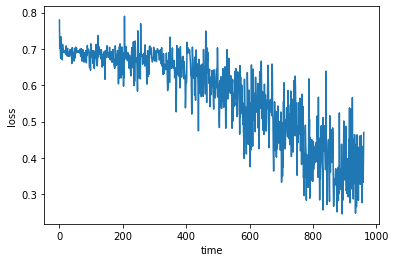

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Flip' + str(epoch) + '.pth'
    torch.save(Net_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

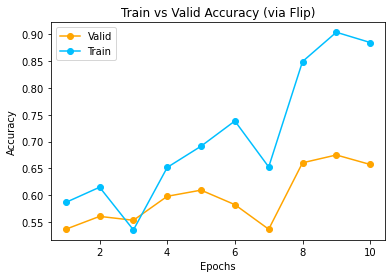

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m1 = test_accu
train_accu_flip_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

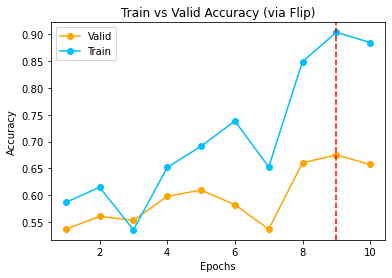

In [11]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m1.index(max(test_accu_flip_m1))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_flip_m1}')
print(f'Test accuracy iteration: {test_accu_flip_m1}')

Train accuracy iteration: [0.5864583333333333, 0.61484375, 0.53515625, 0.6518229166666667, 0.69140625, 0.7384114583333333, 0.6526041666666667, 0.8493489583333333, 0.9040364583333333, 0.8848958333333333]
Test accuracy iteration: [0.5364583333333334, 0.5604166666666667, 0.553125, 0.5979166666666667, 0.609375, 0.5822916666666667, 0.5364583333333334, 0.6604166666666667, 0.675, 0.6572916666666667]


## Rotate

In [13]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Rotate = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.8093045771121978
0 20 0.7559025973081589
0 30 0.7303151905536651
0 40 0.7110082447528839
0 50 0.6540982604026795
0 60 0.7542469322681427
0 70 0.6889636933803558
0 80 0.6927459895610809
0 90 0.7040022075176239
0 100 0.691883647441864
0 110 0.7006079435348511
0 120 0.6901959776878357
0 130 0.6998653531074523
0 140 0.6888243556022644
0 150 0.6994967877864837
0 160 0.6948967695236206
0 170 0.6863646686077118
0 180 0.6939141571521759
0 190 0.6785916566848755
0 200 0.6856659114360809
0 210 0.6861095666885376
0 220 0.6981583297252655
0 230 0.677268123626709
0 240 0.6725215792655945
0 250 0.701585191488266
0 260 0.690891444683075
0 270 0.685093742609024
0 280 0.6897274732589722
0 290 0.6639757573604583
0 300 0.6879023611545563
0 310 0.6799828588962555
0 320 0.6947557747364044
0 330 0.6785566091537476
0 340 0.6990066468715668
0 350 0.689939683675766
0 360 0.6886883735656738
0 370 0.6850560247898102
0 380 0.6976030766963959
0 390 0.6936453700065612
0 400 0.6904322683811188
0 410 0.7102992

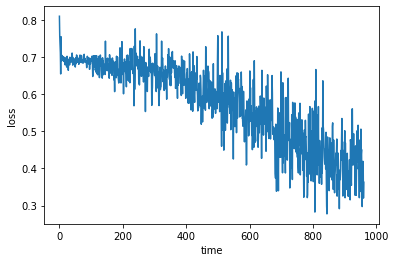

In [14]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Rotate' + str(epoch) + '.pth'
    torch.save(Net_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

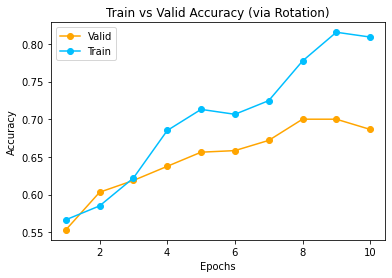

In [15]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m1 = test_accu
train_accu_rotate_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

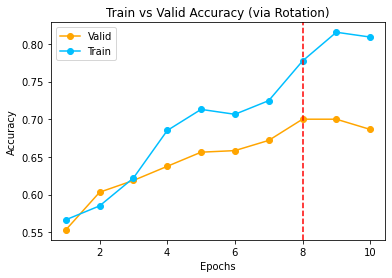

In [16]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m1.index(max(test_accu_rotate_m1))+1, color='r', linestyle='--')
plt.show()

In [17]:
print(f'Train accuracy iteration: {train_accu_rotate_m1}')
print(f'Test accuracy iteration: {test_accu_rotate_m1}')

Train accuracy iteration: [0.5665364583333333, 0.5850260416666667, 0.6220052083333333, 0.6850260416666667, 0.7130208333333333, 0.7065104166666667, 0.724609375, 0.7772135416666667, 0.8153645833333333, 0.808984375]
Test accuracy iteration: [0.553125, 0.603125, 0.61875, 0.6375, 0.65625, 0.6583333333333333, 0.671875, 0.7, 0.7, 0.6864583333333333]


## Crop

In [18]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Crop = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.778692650794983
0 20 0.7204759359359741
0 30 0.724749219417572
0 40 0.7054201543331147
0 50 0.6388473510742188
0 60 0.7642489492893219
0 70 0.6910819828510284
0 80 0.6983508467674255
0 90 0.6937786161899566
0 100 0.692517077922821
0 110 0.6892372071743011
0 120 0.6892797350883484
0 130 0.7143435776233673
0 140 0.6899010300636291
0 150 0.6939790487289429
0 160 0.7029745757579804
0 170 0.6923359036445618
0 180 0.6958751738071441
0 190 0.6907447934150696
0 200 0.6874679446220398
0 210 0.6845667064189911
0 220 0.715921825170517
0 230 0.6994320809841156
0 240 0.6842309355735778
0 250 0.6956400871276855
0 260 0.6917068719863891
0 270 0.697990608215332
0 280 0.6821896374225617
0 290 0.6834013402462006
0 300 0.7046496510505676
0 310 0.6961976826190949
0 320 0.688255512714386
0 330 0.687106317281723
0 340 0.701426500082016
0 350 0.6921889126300812
0 360 0.7063542425632476
0 370 0.6982183635234833
0 380 0.6953480541706085
0 390 0.6959744155406952
0 400 0.6894883751869202
0 410 0.709665107

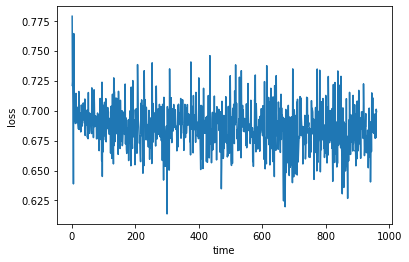

In [19]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Crop' + str(epoch) + '.pth'
    torch.save(Net_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

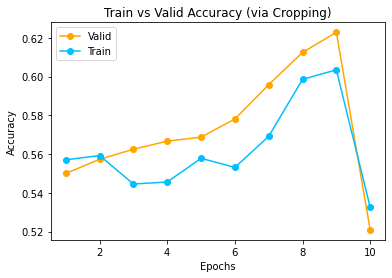

In [20]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m1 = test_accu
train_accu_crop_m1= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

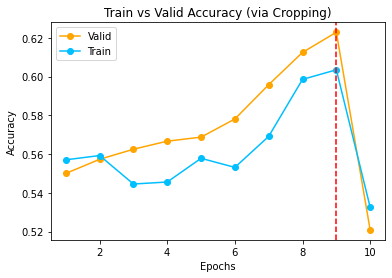

In [21]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m1.index(max(test_accu_crop_m1))+1, color='r', linestyle='--')
plt.show()

In [22]:
print(f'Train accuracy iteration: {train_accu_crop_m1}')
print(f'Test accuracy iteration: {test_accu_crop_m1}')

Train accuracy iteration: [0.55703125, 0.5592447916666666, 0.54453125, 0.5455729166666666, 0.5578125, 0.553125, 0.569140625, 0.5985677083333333, 0.603515625, 0.5325520833333334]
Test accuracy iteration: [0.55, 0.5572916666666666, 0.5625, 0.5666666666666667, 0.56875, 0.578125, 0.5958333333333333, 0.6125, 0.6229166666666667, 0.5208333333333334]


## Color

In [23]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Color = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.018)

0 10 0.7583516120910645
0 20 0.7099709779024124
0 30 0.714178740978241
0 40 0.6862417459487915
0 50 0.683781087398529
0 60 0.7204751014709473
0 70 0.6882984161376953
0 80 0.6973353266716004
0 90 0.6826669991016387
0 100 0.6786278307437896
0 110 0.7059894561767578
0 120 0.7055733025074005
0 130 0.6945433795452118
0 140 0.6958410203456878
0 150 0.6920921564102173
0 160 0.6970234811306
0 170 0.6926392912864685
0 180 0.6985746085643768
0 190 0.6899435460567475
0 200 0.6908868908882141
0 210 0.6873060464859009
0 220 0.7068132042884827
0 230 0.6890893459320069
0 240 0.6848786115646363
0 250 0.6988882839679718
0 260 0.694505363702774
0 270 0.7008264243602753
0 280 0.6873456716537476
0 290 0.6927939832210541
0 300 0.6927193343639374
0 310 0.6895433008670807
0 320 0.6915976166725158
0 330 0.6848207235336303
0 340 0.6938949882984161
0 350 0.7033648490905762
0 360 0.6915996551513672
0 370 0.6951851308345794
0 380 0.6898631930351258
0 390 0.6865556061267852
0 400 0.70073561668396
0 410 0.699062871

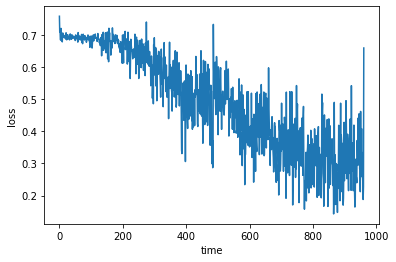

In [24]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Color' + str(epoch) + '.pth'
    torch.save(Net_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

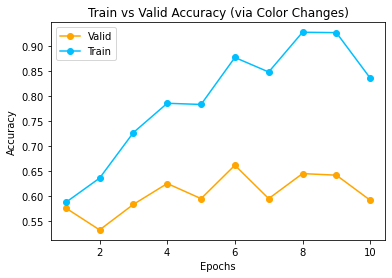

In [25]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m1 = test_accu
train_accu_color_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

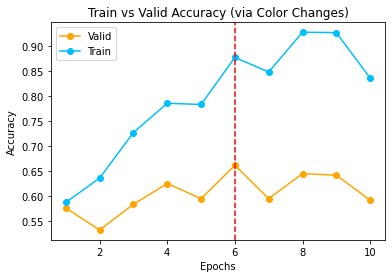

In [26]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m1.index(max(test_accu_color_m1))+1, color='r', linestyle='--')
plt.show()

In [27]:
print(f'Train accuracy iteration: {train_accu_color_m1}')
print(f'Test accuracy iteration: {test_accu_color_m1}')

Train accuracy iteration: [0.5872395833333334, 0.6358072916666667, 0.7268229166666667, 0.7852864583333333, 0.7829427083333333, 0.8768229166666667, 0.8477864583333333, 0.9272135416666667, 0.9264322916666666, 0.8356770833333333]
Test accuracy iteration: [0.5760416666666667, 0.5322916666666667, 0.5833333333333334, 0.625, 0.5947916666666667, 0.6614583333333334, 0.5947916666666667, 0.6447916666666667, 0.6416666666666667, 0.5916666666666667]


## Blur

In [28]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Blur = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.01)

0 10 0.77419713139534
0 20 0.711190938949585
0 30 0.7289359986782074
0 40 0.7059165894985199
0 50 0.6385516822338104
0 60 0.7624830842018128
0 70 0.6991285920143128
0 80 0.6990611135959626
0 90 0.6904697716236115
0 100 0.6938992857933044
0 110 0.6972988784313202
0 120 0.6927672624588013
0 130 0.6958349704742431
0 140 0.6935961723327637
0 150 0.6941822648048401
0 160 0.6932818472385407
0 170 0.6920802354812622
0 180 0.6916650831699371
0 190 0.6811471223831177
0 200 0.6974051654338836
0 210 0.6914529442787171
0 220 0.706170505285263
0 230 0.6926651418209075
0 240 0.6821691513061523
0 250 0.6997771859169006
0 260 0.6884367525577545
0 270 0.6958332002162934
0 280 0.6861430466175079
0 290 0.6793029010295868
0 300 0.6943372547626495
0 310 0.6917696833610535
0 320 0.6960408687591553
0 330 0.6807144105434417
0 340 0.6925333917140961
0 350 0.6922466874122619
0 360 0.678323256969452
0 370 0.703390371799469
0 380 0.6902771115303039
0 390 0.6873293817043304
0 400 0.6956580579280853
0 410 0.6926535

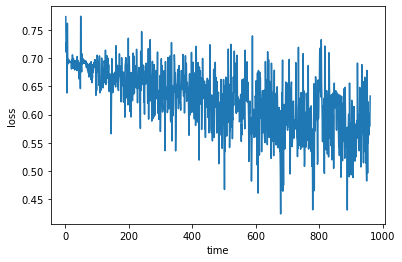

In [29]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Blur' + str(epoch) + '.pth'
    torch.save(Net_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

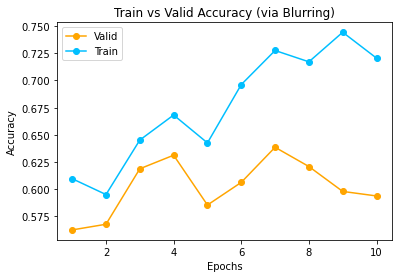

In [30]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m1 = test_accu
train_accu_blur_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

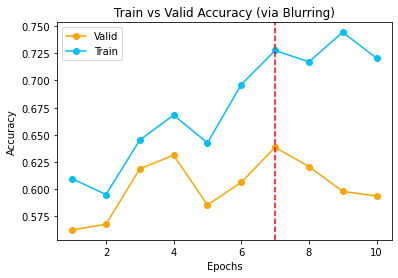

In [31]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m1.index(max(test_accu_blur_m1))+1, color='r', linestyle='--')
plt.show()

In [32]:
print(f'Train accuracy iteration: {train_accu_blur_m1}')
print(f'Test accuracy iteration: {test_accu_blur_m1}')

Train accuracy iteration: [0.6096354166666667, 0.5950520833333334, 0.6451822916666666, 0.6682291666666667, 0.642578125, 0.6962239583333333, 0.7276041666666667, 0.7171875, 0.7444010416666667, 0.7205729166666667]
Test accuracy iteration: [0.5625, 0.5677083333333334, 0.61875, 0.63125, 0.5854166666666667, 0.60625, 0.6385416666666667, 0.6208333333333333, 0.5979166666666667, 0.59375]


## Orignal

In [33]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Orignal = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.015)

0 10 0.7225161850452423
0 20 0.7445205628871918
0 30 0.6782268941402435
0 40 0.6955721259117127
0 50 0.6986231625080108
0 60 0.6975775182247161
0 70 0.7016899287700653
0 80 0.6992961287498474
0 90 0.6897822678089142
0 100 0.6882333755493164
0 110 0.6946152508258819
0 120 0.6839327096939087
0 130 0.7158303022384643
0 140 0.6889488399028778
0 150 0.6986894130706787
0 160 0.688948518037796
0 170 0.6831335365772248
0 180 0.6690756261348725
0 190 0.6926467537879943
0 200 0.6929220497608185
0 210 0.709250807762146
0 220 0.6912302315235138
0 230 0.6799870371818543
0 240 0.6915882170200348
0 250 0.6868557572364807
0 260 0.6897076845169068
0 270 0.7053588449954986
0 280 0.6838839709758758
0 290 0.6980231404304504
0 300 0.6931556761264801
0 310 0.6876780986785889
0 320 0.689655876159668
0 330 0.6899057030677795
0 340 0.690480625629425
0 350 0.6950184941291809
0 360 0.6973504543304443
0 370 0.6906777381896972
0 380 0.686431497335434
0 390 0.6886586487293244
0 400 0.6874867618083954
0 410 0.689837

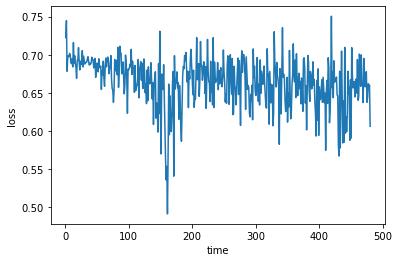

In [34]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net_Orignal' + str(epoch) + '.pth'
    torch.save(Net_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

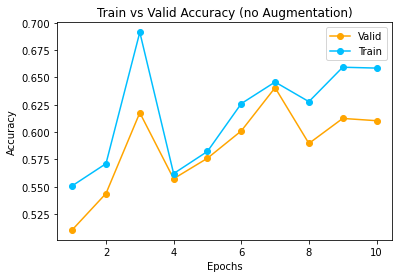

In [35]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m1 = test_accu
train_accu_orignal_m1 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

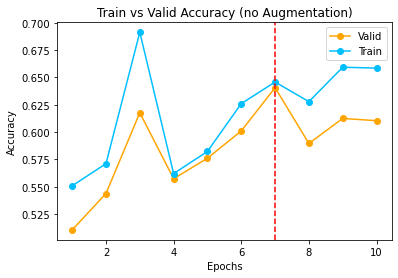

In [36]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m1.index(max(test_accu_orignal_m1))+1, color='r', linestyle='--')
plt.show()

In [37]:
print(f'Train accuracy iteration: {train_accu_orignal_m1}')
print(f'Test accuracy iteration: {test_accu_orignal_m1}')

Train accuracy iteration: [0.55078125, 0.57109375, 0.69140625, 0.5619791666666667, 0.5822916666666667, 0.6260416666666667, 0.6458333333333334, 0.6278645833333333, 0.659375, 0.65859375]
Test accuracy iteration: [0.5104166666666666, 0.54375, 0.6177083333333333, 0.5572916666666666, 0.5760416666666667, 0.6010416666666667, 0.640625, 0.5895833333333333, 0.6125, 0.6104166666666667]


# Model 2

In [7]:
import torch.nn.functional as F 
import torch.optim as optim

class Net2(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, kernel_size= 3)
      self.pool1 = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(16, 32, kernel_size = 3)
      self.conv3 = nn.Conv2d(32, 32, kernel_size = 3)
      self.pool3 = nn.MaxPool2d(3, 3)
      self.norm = nn.BatchNorm2d(32)
      self.dropout1 = nn.Dropout2d(0.2)
      self.dropout2 = nn.Dropout(0.25)
      self.fc1 = nn.Linear(32*41*41, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      x = self.pool1(F.relu(self.conv1(x)))
      x = F.relu(self.conv2(x))
      x = self.norm(x)
      x = self.pool3(F.relu(self.conv3(x)))
      x = self.dropout1(x)
      x = x.view(-1, 32*41*41)
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

## Flip

In [39]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Flip = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.012)

0 10 0.956349003314972
0 20 0.7674770355224609
0 30 0.7851349592208863
0 40 0.7183867692947388
0 50 0.69023317694664
0 60 0.6960915207862854
0 70 0.6940414786338807
0 80 0.709452337026596
0 90 0.6725495278835296
0 100 0.7020449340343475
0 110 0.7013089656829834
0 120 0.7032213151454926
0 130 0.7004708588123322
0 140 0.6987949490547181
0 150 0.6928317546844482
0 160 0.6931046903133392
0 170 0.6923639118671417
0 180 0.6850471198558807
0 190 0.692823988199234
0 200 0.7199590325355529
0 210 0.701176005601883
0 220 0.7027829766273499
0 230 0.6919992566108704
0 240 0.6840331196784973
0 250 0.7030959546566009
0 260 0.6912916123867034
0 270 0.6980493187904357
0 280 0.6996179759502411
0 290 0.6943155109882355
0 300 0.6969639778137207
0 310 0.6769908845424653
0 320 0.7202922582626343
0 330 0.6884872138500213
0 340 0.6933773875236511
0 350 0.6890426456928254
0 360 0.6892476439476013
0 370 0.7010833263397217
0 380 0.7036802411079407
0 390 0.6945748865604401
0 400 0.6923596680164337
0 410 0.6921160

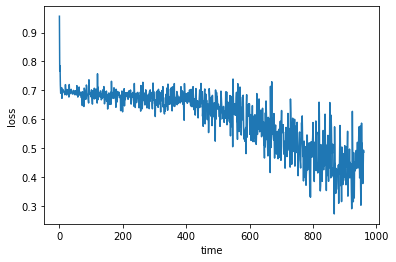

In [40]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Flip' + str(epoch) + '.pth'
    torch.save(Net2_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

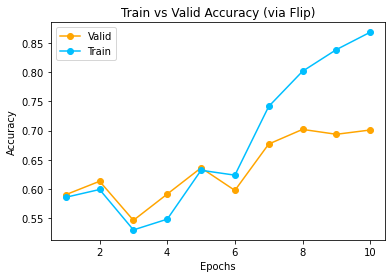

In [41]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m2 = test_accu
train_accu_flip_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

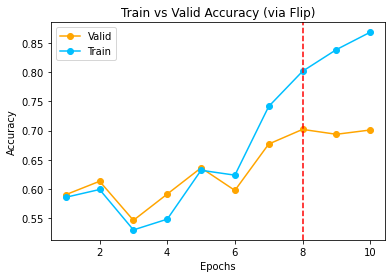

In [42]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m2.index(max(test_accu_flip_m2))+1, color='r', linestyle='--')
plt.show()

In [43]:
print(f'Train accuracy iteration: {train_accu_flip_m2}')
print(f'Test accuracy iteration: {test_accu_flip_m2}')

Train accuracy iteration: [0.5861979166666667, 0.5994791666666667, 0.53046875, 0.548828125, 0.6322916666666667, 0.6239583333333333, 0.7412760416666667, 0.8013020833333333, 0.83828125, 0.86796875]
Test accuracy iteration: [0.590625, 0.6135416666666667, 0.546875, 0.5916666666666667, 0.6364583333333333, 0.5979166666666667, 0.6770833333333334, 0.7020833333333333, 0.69375, 0.7010416666666667]


## Rotate

In [44]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Rotate = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.9885560393333435
0 20 0.7432825565338135
0 30 0.7358532965183258
0 40 0.720514965057373
0 50 0.7036267697811127
0 60 0.6967073261737824
0 70 0.6959349751472473
0 80 0.6998039305210113
0 90 0.6781749129295349
0 100 0.7180342376232147
0 110 0.6947771072387695
0 120 0.6969769716262817
0 130 0.6998099267482758
0 140 0.7042188465595245
0 150 0.692713874578476
0 160 0.7005285739898681
0 170 0.6970204174518585
0 180 0.6989338278770447
0 190 0.6911715149879456
0 200 0.6948043167591095
0 210 0.6951588928699494
0 220 0.7103913605213166
0 230 0.6887565732002259
0 240 0.6927009761333466
0 250 0.708386892080307
0 260 0.6905905306339264
0 270 0.694319224357605
0 280 0.7064229488372803
0 290 0.6883723735809326
0 300 0.69796382188797
0 310 0.6875156998634339
0 320 0.7046935141086579
0 330 0.694655042886734
0 340 0.7017561078071595
0 350 0.6921802759170532
0 360 0.6904974341392517
0 370 0.6939091265201569
0 380 0.6981739819049835
0 390 0.6966397106647492
0 400 0.6904521644115448
0 410 0.70580821

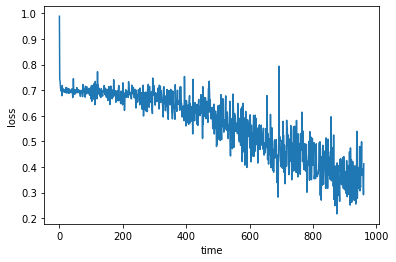

In [45]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Rotate' + str(epoch) + '.pth'
    torch.save(Net2_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

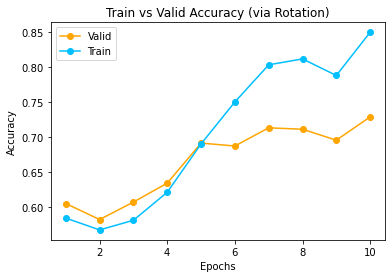

In [46]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m2 = test_accu
train_accu_rotate_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

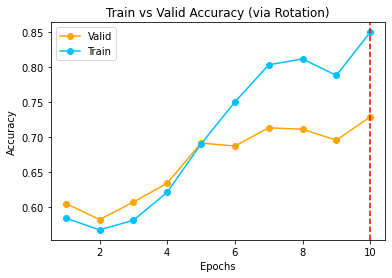

In [47]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m2.index(max(test_accu_rotate_m2))+1, color='r', linestyle='--')
plt.show()

In [48]:
print(f'Train accuracy iteration: {train_accu_rotate_m2}')
print(f'Test accuracy iteration: {test_accu_rotate_m2}')

Train accuracy iteration: [0.584375, 0.5674479166666667, 0.58125, 0.6213541666666667, 0.6904947916666667, 0.7505208333333333, 0.8036458333333333, 0.812109375, 0.7884114583333334, 0.8502604166666666]
Test accuracy iteration: [0.6052083333333333, 0.5822916666666667, 0.6072916666666667, 0.634375, 0.6916666666666667, 0.6875, 0.7135416666666666, 0.7114583333333333, 0.6958333333333333, 0.7291666666666666]


## Crop

In [49]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Crop = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.8646320641040802
0 20 0.7838484346866608
0 30 0.7313521981239319
0 40 0.7119683504104615
0 50 0.7000300765037537
0 60 0.719959831237793
0 70 0.7182548642158508
0 80 0.708623331785202
0 90 0.6714382946491242
0 100 0.7089302003383636
0 110 0.6957001090049744
0 120 0.688826060295105
0 130 0.7055439054965973
0 140 0.7136246621608734
0 150 0.696356201171875
0 160 0.705211877822876
0 170 0.6947459697723388
0 180 0.7005531132221222
0 190 0.6941728532314301
0 200 0.6954034030437469
0 210 0.7012651085853576
0 220 0.696369069814682
0 230 0.6915218889713287
0 240 0.6915868043899536
0 250 0.70405592918396
0 260 0.6870517373085022
0 270 0.6975085079669953
0 280 0.6973710000514984
0 290 0.6951005697250366
0 300 0.6992216825485229
0 310 0.6886483192443847
0 320 0.7023762106895447
0 330 0.6953773438930512
0 340 0.6954987645149231
0 350 0.6952481687068939
0 360 0.6917579948902131
0 370 0.6895196855068206
0 380 0.6978608071804047
0 390 0.7003216326236725
0 400 0.68250812292099
0 410 0.70607411861

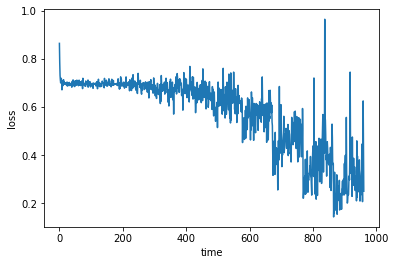

In [50]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Crop' + str(epoch) + '.pth'
    torch.save(Net2_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

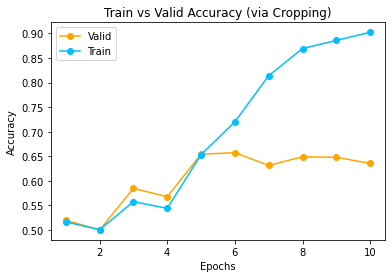

In [51]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m2 = test_accu
train_accu_crop_m2= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

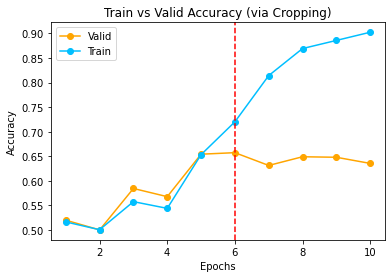

In [52]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m2.index(max(test_accu_crop_m2))+1, color='r', linestyle='--')
plt.show()

In [53]:
print(f'Train accuracy iteration: {train_accu_crop_m2}')
print(f'Test accuracy iteration: {test_accu_crop_m2}')

Train accuracy iteration: [0.5162760416666666, 0.500390625, 0.5575520833333333, 0.5438802083333333, 0.6532552083333333, 0.7200520833333334, 0.8141927083333333, 0.8692708333333333, 0.8858072916666667, 0.9024739583333333]
Test accuracy iteration: [0.5197916666666667, 0.5, 0.584375, 0.5677083333333334, 0.6541666666666667, 0.6572916666666667, 0.63125, 0.6489583333333333, 0.6479166666666667, 0.6354166666666666]


## Color

In [22]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Color = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.017)

0 10 0.8946056425571441
0 20 0.7569486975669861
0 30 0.7569672107696533
0 40 0.7306285083293915
0 50 0.6908661723136902
0 60 0.6951642513275147
0 70 0.7119313061237336
0 80 0.711614602804184
0 90 0.6797358274459839
0 100 0.702738243341446
0 110 0.7080153048038482
0 120 0.6943901240825653
0 130 0.6957991659641266
0 140 0.7019623398780823
0 150 0.6939195215702056
0 160 0.6922174096107483
0 170 0.6968837261199952
0 180 0.6889222145080567
0 190 0.6868855476379394
0 200 0.6966090738773346
0 210 0.7151596546173096
0 220 0.6862343907356262
0 230 0.6784017860889435
0 240 0.6952768802642822
0 250 0.7111673772335052
0 260 0.6838726878166199
0 270 0.6996698558330536
0 280 0.6953494727611542
0 290 0.688482129573822
0 300 0.7054261326789856
0 310 0.6735965967178345
0 320 0.6989584803581238
0 330 0.6812139570713043
0 340 0.699098938703537
0 350 0.6791741728782654
0 360 0.6944417655467987
0 370 0.7179197430610657
0 380 0.698329871892929
0 390 0.6925975739955902
0 400 0.6990396499633789
0 410 0.698560

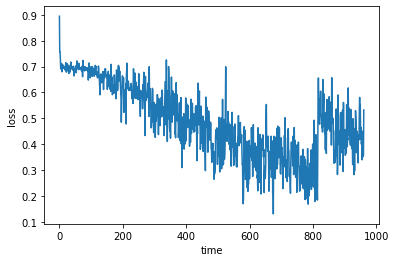

In [23]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Color' + str(epoch) + '.pth'
    torch.save(Net2_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

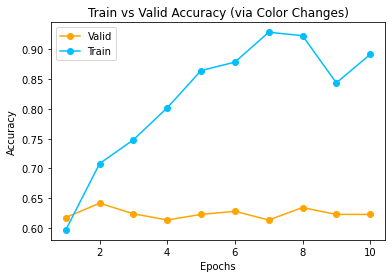

In [24]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m2 = test_accu
train_accu_color_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

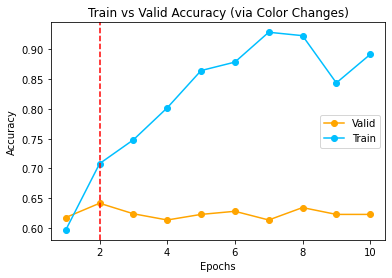

In [25]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m2.index(max(test_accu_color_m2))+1, color='r', linestyle='--')
plt.show()

In [26]:
print(f'Train accuracy iteration: {train_accu_color_m2}')
print(f'Test accuracy iteration: {test_accu_color_m2}')

Train accuracy iteration: [0.596875, 0.708203125, 0.7481770833333333, 0.8018229166666667, 0.8643229166666667, 0.878515625, 0.9286458333333333, 0.9229166666666667, 0.8436197916666667, 0.89140625]
Test accuracy iteration: [0.6177083333333333, 0.6416666666666667, 0.6239583333333333, 0.6135416666666667, 0.6229166666666667, 0.628125, 0.6135416666666667, 0.634375, 0.6229166666666667, 0.6229166666666667]


## Blur

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Blur = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.011)

0 10 0.850732398033142
0 20 0.7743382751941681
0 30 0.7254273355007171
0 40 0.6843995690345764
0 50 0.6957303524017334
0 60 0.7008300960063935
0 70 0.6995046079158783
0 80 0.7058760166168213
0 90 0.6668419420719147
0 100 0.7202630400657654
0 110 0.6916408896446228
0 120 0.7010764002799987
0 130 0.6982126533985138
0 140 0.7069097280502319
0 150 0.6956436395645141
0 160 0.6980391442775726
0 170 0.6912864327430726
0 180 0.6975594222545624
0 190 0.6918636083602905
0 200 0.6926631450653076
0 210 0.6926952004432678
0 220 0.7041114926338196
0 230 0.6890541732311248
0 240 0.6948225021362304
0 250 0.7009636640548706
0 260 0.6984217584133148
0 270 0.6934888958930969
0 280 0.7011516153812408
0 290 0.686353451013565
0 300 0.6989700615406036
0 310 0.6815762877464294
0 320 0.7007091045379639
0 330 0.6824599921703338
0 340 0.7069926142692566
0 350 0.6879868686199189
0 360 0.6767630398273468
0 370 0.7079762995243073
0 380 0.7029980838298797
0 390 0.6929231822490692
0 400 0.691883134841919
0 410 0.6984

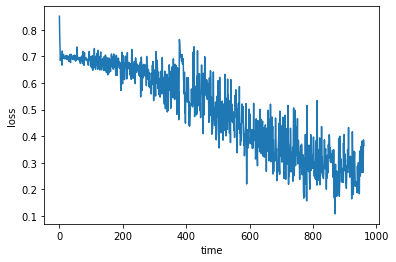

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Blur' + str(epoch) + '.pth'
    torch.save(Net2_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

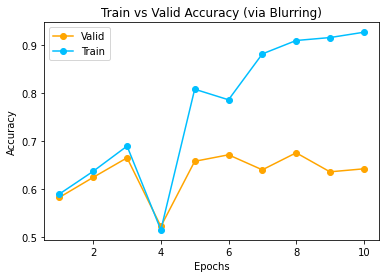

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m2 = test_accu
train_accu_blur_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

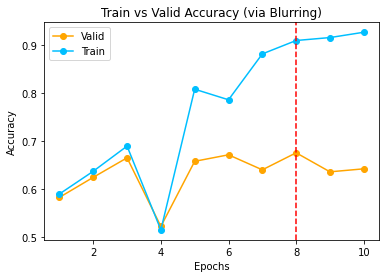

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m2.index(max(test_accu_blur_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m2}')
print(f'Test accuracy iteration: {test_accu_blur_m2}')

Train accuracy iteration: [0.5903645833333333, 0.6376302083333333, 0.6899739583333333, 0.515625, 0.8083333333333333, 0.786328125, 0.8817708333333333, 0.9096354166666667, 0.9157552083333333, 0.9268229166666667]
Test accuracy iteration: [0.5833333333333334, 0.625, 0.665625, 0.5229166666666667, 0.6583333333333333, 0.671875, 0.640625, 0.6760416666666667, 0.6364583333333333, 0.6427083333333333]


## Orignal

In [14]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Orignal = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.008)

0 10 1.0425798654556275
0 20 0.7459446549415588
0 30 0.7329780697822571
0 40 0.6907487273216247
0 50 0.6959940135478974
0 60 0.7060271203517914
0 70 0.674317079782486
0 80 0.7148004531860351
0 90 0.705839091539383
0 100 0.7022667944431304
0 110 0.6980870544910431
0 120 0.697165048122406
0 130 0.7061497807502747
0 140 0.7070666253566742
0 150 0.6894255399703979
0 160 0.7086190700531005
0 170 0.6955140650272369
0 180 0.698577493429184
0 190 0.6969618976116181
0 200 0.6991359949111938
0 210 0.6911399781703949
0 220 0.6794277548789978
0 230 0.7035265445709229
0 240 0.7212946832180023
0 250 0.7008912205696106
0 260 0.6518168032169342
0 270 0.7073582231998443
0 280 0.6930506825447083
0 290 0.7128702759742737
0 300 0.7088608503341675
0 310 0.7053589642047882
0 320 0.6893537819385529
0 330 0.703079354763031
0 340 0.697077602148056
0 350 0.6837947070598602
0 360 0.6903721988201141
0 370 0.702116972208023
0 380 0.695018070936203
0 390 0.6900307238101959
0 400 0.6938326239585877
0 410 0.703458249

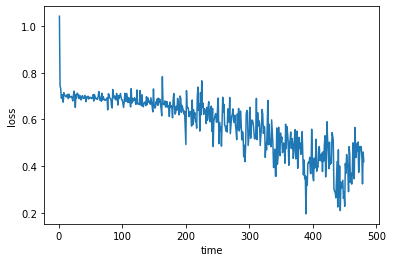

In [15]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net2_Orignal' + str(epoch) + '.pth'
    torch.save(Net2_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

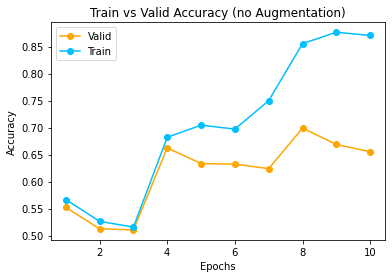

In [16]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m2 = test_accu
train_accu_orignal_m2 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

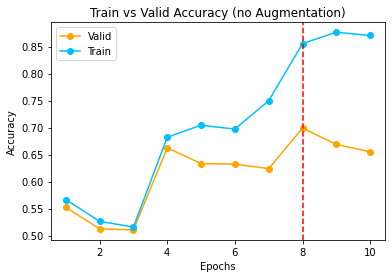

In [17]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m2.index(max(test_accu_orignal_m2))+1, color='r', linestyle='--')
plt.show()

In [18]:
print(f'Train accuracy iteration: {train_accu_orignal_m2}')
print(f'Test accuracy iteration: {test_accu_orignal_m2}')

Train accuracy iteration: [0.5666666666666667, 0.5263020833333333, 0.515625, 0.68203125, 0.7044270833333334, 0.6971354166666667, 0.7497395833333333, 0.85546875, 0.8765625, 0.8705729166666667]
Test accuracy iteration: [0.5520833333333334, 0.5125, 0.5104166666666666, 0.6625, 0.6333333333333333, 0.6322916666666667, 0.6239583333333333, 0.6989583333333333, 0.66875, 0.6552083333333333]


# Model 3

In [7]:
import torch.nn.functional as F 
import torch.optim as optim
from typing import Callable, Any, Optional, Tuple, List
from torch import nn, Tensor

class Net3(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1a = BasicConv2d(3, 32, kernel_size = 3, stride = 2)
      self.conv2a = BasicConv2d(32, 32, kernel_size = 3)
      self.conv2b = BasicConv2d(32, 64, kernel_size = 3, padding = 1)
      self.pool3 = nn.MaxPool2d(kernel_size = 3, stride = 2)
      self.mixed4 = InceptionA(64, pool_features = 32)
      self.dropout1 = nn.Dropout2d(0.5)
      self.dropout2 = nn.Dropout(0.5)
      self.fc1 = nn.Linear(62*62*144, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      # 256 x 256 x 3
      x = self.conv1a(x)
      # 127 x 127 x 32
      x = self.conv2a(x)
      # 125 x 125 x 32
      x = self.conv2b(x)
      # 125 x 125 x 64
      x = self.pool3(x)
      # 62 x 62 x 64
      x = self.mixed4(x)
      # 62 x 62 x 144
      x = self.dropout1(x)
      x = x.view(-1, 62*62*144)
      # 144
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

class InceptionA(nn.Module):
    def __init__(
        self, in_channels: int, pool_features: int, conv_block: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super().__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.branch1x1 = conv_block(in_channels, 32, kernel_size=1)

        self.branch5x5_1 = conv_block(in_channels, 24, kernel_size=1)
        self.branch5x5_2 = conv_block(24, 32, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = conv_block(in_channels, 32, kernel_size=1)
        self.branch3x3dbl_2 = conv_block(32, 48, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = conv_block(48, 48, kernel_size=3, padding=1)

        self.branch_pool = conv_block(in_channels, pool_features, kernel_size=1)

    def _forward(self, x: Tensor) -> List[Tensor]:
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return outputs

    def forward(self, x: Tensor) -> Tensor:
        outputs = self._forward(x)
        return torch.cat(outputs, 1)

class BasicConv2d(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, **kwargs: Any) -> None:
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

## Flip

In [9]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Flip = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Flip.parameters(), lr=0.001, momentum=0.8)

0 10 0.92890605032444
0 20 4.696060574054718
0 30 2.0216316103935243
0 40 0.9087688952684403
0 50 1.0048260152339936
0 60 0.7378417670726776
0 70 0.7883214056491852
0 80 0.7434145867824554
0 90 0.6648560106754303
0 100 0.7131857544183731
0 110 0.695868718624115
0 120 0.7180845826864243
0 130 0.7306912839412689
0 140 0.7219990968704224
0 150 0.6805245041847229
0 160 0.6934162437915802
0 170 0.6852626442909241
0 180 0.7182636499404907
0 190 0.6877360165119171
0 200 0.7073377430438995
0 210 0.7150621294975281
0 220 0.6511273384094238
0 230 0.6766123056411744
0 240 0.732721084356308
0 250 0.7003343224525451
0 260 0.7018584787845612
0 270 0.7154212355613708
0 280 0.6907168567180634
0 290 0.6401685118675232
0 300 0.792309021949768
0 310 0.6778622746467591
0 320 0.6700693488121032
0 330 0.6985238134860993
0 340 0.7264133632183075
0 350 0.7303283870220184
0 360 0.7163772940635681
0 370 0.6669647037982941
0 380 0.6911860525608062
0 390 0.6770015358924866
0 400 0.7053919970989228
0 410 0.6892920

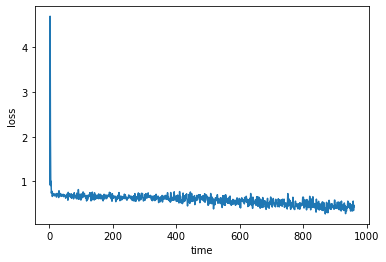

In [10]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Flip' + str(epoch) + '.pth'
    torch.save(Net3_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

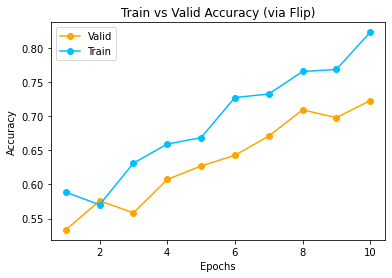

In [11]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m3 = test_accu
train_accu_flip_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

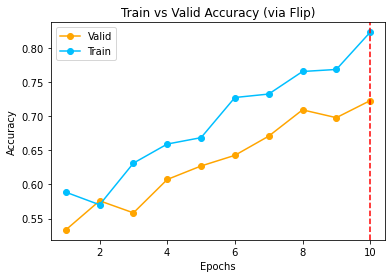

In [12]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m3.index(max(test_accu_flip_m3))+1, color='r', linestyle='--')
plt.show()

In [13]:
print(f'Train accuracy iteration: {train_accu_flip_m3}')
print(f'Test accuracy iteration: {test_accu_flip_m3}')

Train accuracy iteration: [0.588671875, 0.5701822916666667, 0.63125, 0.6592447916666667, 0.6686197916666666, 0.7274739583333333, 0.7325520833333333, 0.765625, 0.7686197916666667, 0.8231770833333333]
Test accuracy iteration: [0.5333333333333333, 0.5760416666666667, 0.5583333333333333, 0.6072916666666667, 0.6270833333333333, 0.6427083333333333, 0.6708333333333333, 0.709375, 0.6979166666666666, 0.7229166666666667]


## Rotate

In [9]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Rotate = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Rotate.parameters(), lr=0.001, momentum=0.8)

0 10 0.8610918715596199
0 20 2.4035380303859712
0 30 3.5174647331237794
0 40 2.4492606043815615
0 50 0.950441551208496
0 60 1.3800531536340714
0 70 0.9266538590192794
0 80 0.773820549249649
0 90 0.7280704259872437
0 100 0.6867524445056915
0 110 0.708704149723053
0 120 0.7275050163269043
0 130 0.6611545503139495
0 140 0.7149428963661194
0 150 0.6866474211215973
0 160 0.7319734871387482
0 170 0.7386591672897339
0 180 0.733655822277069
0 190 0.6423088729381561
0 200 0.7996669352054596
0 210 0.6675409078598022
0 220 0.6534014463424682
0 230 0.6067146182060241
0 240 0.8219535887241364
0 250 0.7122205436229706
0 260 0.7257872819900513
0 270 0.7037099719047546
0 280 0.7005943059921265
0 290 0.649935519695282
0 300 0.7395070314407348
0 310 0.6989410638809204
0 320 0.6807516038417816
0 330 0.6842424154281617
0 340 0.6743553280830383
0 350 0.6577432036399842
0 360 0.7043736279010773
0 370 0.7149455726146698
0 380 0.6888821721076965
0 390 0.6948444843292236
0 400 0.6599428534507752
0 410 0.731346

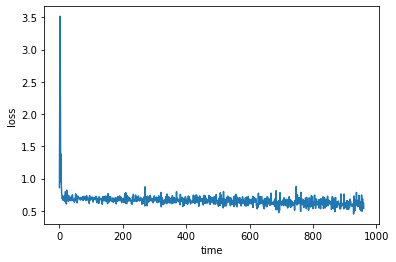

In [10]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Rotate' + str(epoch) + '.pth'
    torch.save(Net3_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

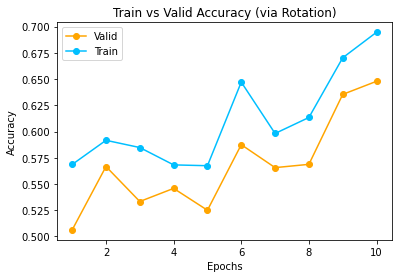

In [11]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m3 = test_accu
train_accu_rotate_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

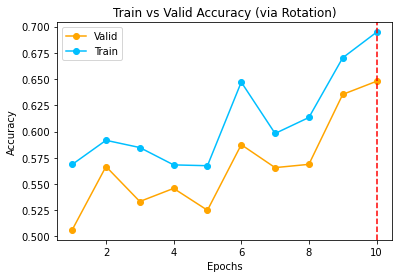

In [12]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m3.index(max(test_accu_rotate_m3))+1, color='r', linestyle='--')
plt.show()

In [13]:
print(f'Train accuracy iteration: {train_accu_rotate_m3}')
print(f'Test accuracy iteration: {test_accu_rotate_m3}')

Train accuracy iteration: [0.5686197916666667, 0.5916666666666667, 0.584765625, 0.5682291666666667, 0.5674479166666667, 0.6471354166666666, 0.5981770833333333, 0.6134114583333333, 0.6703125, 0.6946614583333334]
Test accuracy iteration: [0.50625, 0.5666666666666667, 0.5333333333333333, 0.5458333333333333, 0.525, 0.5875, 0.565625, 0.56875, 0.6354166666666666, 0.6479166666666667]


## Crop

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Crop = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Crop.parameters(), lr=0.001, momentum=0.8)

0 10 1.4242113947868347
0 20 2.577408254146576
0 30 2.8539137065410616
0 40 2.2461380481719972
0 50 1.1697354108095168
0 60 1.0408143132925034
0 70 0.7967299163341522
0 80 0.7732185006141663
0 90 0.7151841044425964
0 100 0.7128517389297485
0 110 0.6939645171165466
0 120 0.77698312997818
0 130 0.7892615079879761
0 140 0.754665195941925
0 150 0.6975043058395386
0 160 0.694492083787918
0 170 0.7303077697753906
0 180 0.7257292628288269
0 190 0.7056390941143036
0 200 0.7184525907039643
0 210 0.6905119776725769
0 220 0.7082343995571136
0 230 0.6612796366214753
0 240 0.7449891924858093
0 250 0.6925924956798554
0 260 0.6878316283226014
0 270 0.6948099792003631
0 280 0.7224532246589661
0 290 0.7212890326976776
0 300 0.6697153925895691
0 310 0.7038480758666992
0 320 0.7073131620883941
0 330 0.7218186438083649
0 340 0.7159067392349243
0 350 0.6755402147769928
0 360 0.7317108154296875
0 370 0.6989736020565033
0 380 0.6991831660270691
0 390 0.7021924018859863
0 400 0.7058767259120942
0 410 0.687740

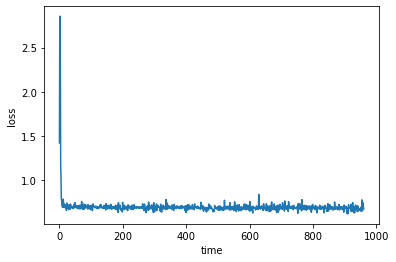

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Crop' + str(epoch) + '.pth'
    torch.save(Net3_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

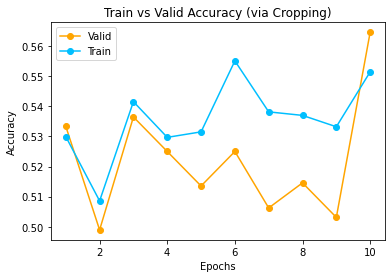

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m3 = test_accu
train_accu_crop_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

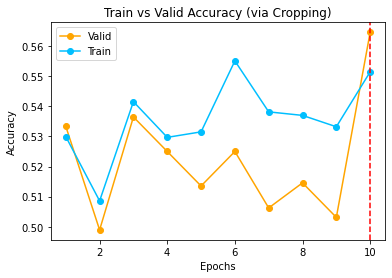

In [11]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m3.index(max(test_accu_crop_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_crop_m3}')
print(f'Test accuracy iteration: {test_accu_crop_m3}')

Train accuracy iteration: [0.5299479166666666, 0.50859375, 0.5415364583333333, 0.5296875, 0.5315104166666667, 0.555078125, 0.5381510416666667, 0.5369791666666667, 0.533203125, 0.5514322916666666]
Test accuracy iteration: [0.5333333333333333, 0.49895833333333334, 0.5364583333333334, 0.525, 0.5135416666666667, 0.525, 0.50625, 0.5145833333333333, 0.503125, 0.5645833333333333]


## Color

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Color = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Color.parameters(), lr=0.001, momentum=0.8)

0 10 0.8335323184728622
0 20 4.863950470089913
0 30 3.9774495720863343
0 40 1.6175386667251588
0 50 1.0361424088478088
0 60 0.9032488822937011
0 70 0.7802971422672271
0 80 0.6932823359966278
0 90 0.824864512681961
0 100 0.6808135569095611
0 110 0.7496791243553161
0 120 0.6643687427043915
0 130 0.7677574098110199
0 140 0.6848694860935212
0 150 0.7048364460468293
0 160 0.6800948172807694
0 170 0.6660423964262009
0 180 0.7301769375801086
0 190 0.760222727060318
0 200 0.7011965036392211
0 210 0.693733024597168
0 220 0.6956281960010529
0 230 0.6853775382041931
0 240 0.7268675982952117
0 250 0.7203616321086883
0 260 0.6997727811336517
0 270 0.6728634119033814
0 280 0.7166673004627228
0 290 0.6561467409133911
0 300 0.7587535858154297
0 310 0.7040467083454132
0 320 0.6793028295040131
0 330 0.6749686002731323
0 340 0.6780878514051437
0 350 0.6647646427154541
0 360 0.743437260389328
0 370 0.6951208174228668
0 380 0.7128838002681732
0 390 0.6741040885448456
0 400 0.6650194585323334
0 410 0.681559

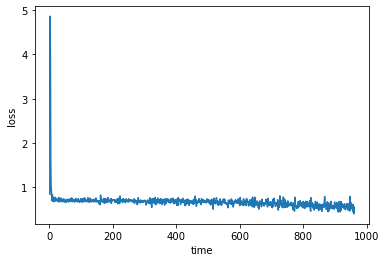

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Color' + str(epoch) + '.pth'
    torch.save(Net3_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

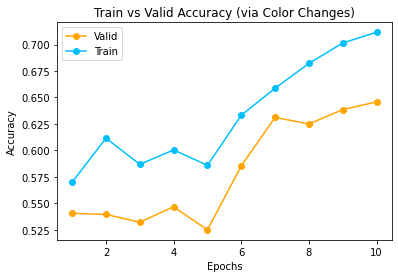

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m3 = test_accu
train_accu_color_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

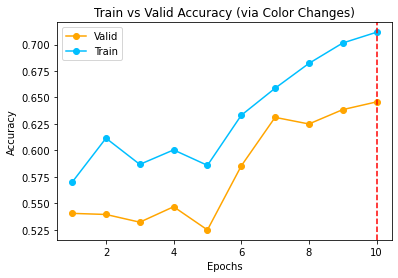

In [11]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m3.index(max(test_accu_color_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_color_m3}')
print(f'Test accuracy iteration: {test_accu_color_m3}')

Train accuracy iteration: [0.5700520833333333, 0.6115885416666667, 0.5868489583333333, 0.6005208333333333, 0.5859375, 0.633203125, 0.6587239583333333, 0.6821614583333333, 0.7014322916666667, 0.7115885416666666]
Test accuracy iteration: [0.540625, 0.5395833333333333, 0.5322916666666667, 0.546875, 0.525, 0.5854166666666667, 0.63125, 0.625, 0.6385416666666667, 0.6458333333333334]


## Blur

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Blur = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Blur.parameters(), lr=0.001, momentum=0.8)

0 10 1.0903895199298859
0 20 4.260603499412537
0 30 2.4241981863975526
0 40 1.130168855190277
0 50 0.8845356166362762
0 60 0.926155686378479
0 70 0.7996585369110107
0 80 0.7171940863132477
0 90 0.719958022236824
0 100 0.7377599477767944
0 110 0.6869020640850068
0 120 0.6810552179813385
0 130 0.6611294358968735
0 140 0.6471719384193421
0 150 0.7317254543304443
0 160 0.6939988315105439
0 170 0.6965232253074646
0 180 0.6888710677623748
0 190 0.6689806759357453
0 200 0.7802990853786469
0 210 0.6864829003810883
0 220 0.6980522632598877
0 230 0.6788697481155396
0 240 0.7363009989261627
0 250 0.7503479659557343
0 260 0.7527948021888733
0 270 0.672777533531189
0 280 0.7525015413761139
0 290 0.6498958885669708
0 300 0.6898750543594361
0 310 0.7157111465930939
0 320 0.7701556384563446
0 330 0.6934073030948639
0 340 0.7341907441616058
0 350 0.6936442375183105
0 360 0.7413713753223419
0 370 0.6872219264507293
0 380 0.7219028770923615
0 390 0.682695084810257
0 400 0.7239096224308014
0 410 0.6985076

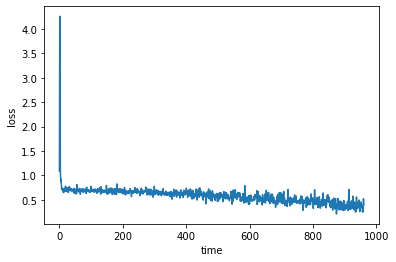

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Blur' + str(epoch) + '.pth'
    torch.save(Net3_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

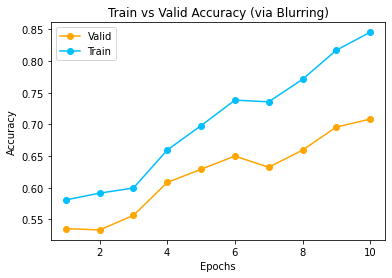

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m3 = test_accu
train_accu_blur_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

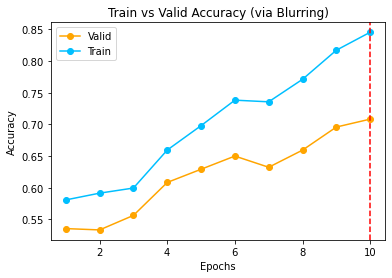

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m3.index(max(test_accu_blur_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m3}')
print(f'Test accuracy iteration: {test_accu_blur_m3}')

Train accuracy iteration: [0.5807291666666666, 0.59140625, 0.5994791666666667, 0.6595052083333334, 0.698046875, 0.73828125, 0.7356770833333334, 0.7712239583333333, 0.8171875, 0.8455729166666667]
Test accuracy iteration: [0.5354166666666667, 0.5333333333333333, 0.55625, 0.6083333333333333, 0.6291666666666667, 0.65, 0.6322916666666667, 0.659375, 0.6958333333333333, 0.7083333333333334]


## Orignal

In [8]:
# set seed
torch.manual_seed(3)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Orignal = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Orignal.parameters(), lr=0.001, momentum=0.8)

0 10 1.7723353207111359
0 20 2.9214959025382994
0 30 1.6250151157379151
0 40 0.732758629322052
0 50 0.7632182836532593
0 60 0.7274849832057952
0 70 0.6979661464691163
0 80 0.6787339687347412
0 90 0.7089061200618744
0 100 0.6184617340564728
0 110 0.7787052273750306
0 120 0.6864709496498108
0 130 0.7107487976551056
0 140 0.6486036360263825
0 150 0.6847935914993286
0 160 0.6466200947761536
0 170 0.7463982462882995
0 180 0.744850468635559
0 190 0.7029611885547637
0 200 0.6722770273685456
0 210 0.6938463985919953
0 220 0.6877446234226227
0 230 0.6527484267950058
0 240 0.7494929611682892
0 250 0.6958723604679108
0 260 0.6725309520959855
0 270 0.6533225357532502
0 280 0.7092223167419434
0 290 0.7065096318721771
0 300 0.7269019722938538
0 310 0.6961375892162323
0 320 0.6904406309127807
0 330 0.7071900755167008
0 340 0.6428789913654327
0 350 0.7073247134685516
0 360 0.6892077028751373
0 370 0.660776162147522
0 380 0.6632155746221542
0 390 0.687810730934143
0 400 0.7892574667930603
0 410 0.67390

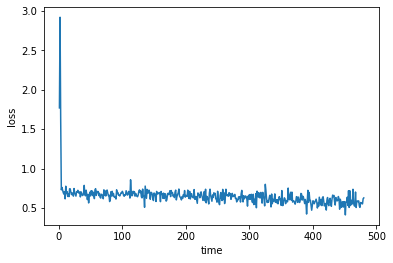

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed3/Net3_Orignal' + str(epoch) + '.pth'
    torch.save(Net3_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

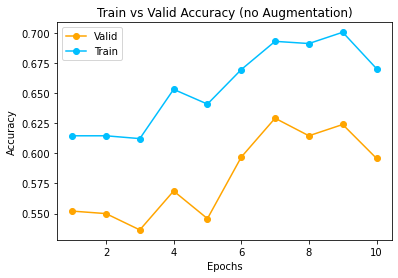

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m3 = test_accu
train_accu_orignal_m3 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

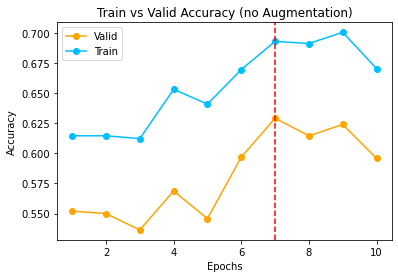

In [11]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m3.index(max(test_accu_orignal_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_orignal_m3}')
print(f'Test accuracy iteration: {test_accu_orignal_m3}')

Train accuracy iteration: [0.6145833333333334, 0.6145833333333334, 0.6122395833333333, 0.653125, 0.6408854166666667, 0.66953125, 0.69296875, 0.6911458333333333, 0.7005208333333334, 0.6703125]
Test accuracy iteration: [0.5520833333333334, 0.55, 0.5364583333333334, 0.56875, 0.5458333333333333, 0.596875, 0.6291666666666667, 0.6145833333333334, 0.6239583333333333, 0.5958333333333333]
